## Author: NANDKISHOR SATPUTE

### Exploratory Data Analysis - Terrorism
###### Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

##### As a security/defense analyst, try to find out the hot zone of terrorism.

##### What all security issues and insights you can derive by EDA?mport numpy as np


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 !pip install folium

     |████████████████████████████████| 94 kB 2.6 MB/s eta 0:00:011


In [4]:
import folium
from folium.plugins import MarkerCluster

In [42]:
 df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')


ParserError: Error tokenizing data. C error: EOF inside string starting at row 153560

In [10]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73878 entries, 0 to 73877
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(20), object(58)
memory usage: 76.1+ MB


In [18]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.387800e+04,73878.000000,73878.000000,73878.000000,73878.000000,73878.000000,73878.000000,70088.000000,7.008700e+04,73878.000000,...,7.900000e+02,96.000000,2.740000e+02,100.000000,2259.000000,1857.000000,73877.000000,73877.000000,73877.000000,73877.000000
mean,1.988047e+11,1987.981118,6.465822,15.371802,0.024364,146.647256,5.844148,18.924826,-1.239121e+03,1.436490,...,3.379599e+06,8111.593750,7.669540e+05,1138.770000,3.698097,-6.794292,-3.767208,-3.724204,0.125722,-2.978126
std,7.207811e+08,7.207305,3.400727,8.812265,0.154179,136.764811,3.199139,24.019816,3.255498e+05,1.104595,...,3.705270e+07,46756.201267,3.594205e+06,6717.876277,1.904275,53.529084,4.503126,4.559418,0.792261,4.521462
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.983041e+11,1983.000000,4.000000,8.000000,0.000000,61.000000,3.000000,6.207810,-7.545161e+01,1.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.989012e+11,1989.000000,6.000000,15.000000,0.000000,110.000000,6.000000,17.865293,-1.789272e+00,1.000000,...,1.000000e+04,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.994030e+11,1994.000000,9.000000,23.000000,0.000000,183.000000,8.000000,38.552185,3.525351e+01,1.000000,...,5.000000e+05,0.000000,8.000000e+04,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,1.000000
max,2.002032e+11,2002.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,400000.000000,4.100000e+07,48000.000000,7.000000,750.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999985,0.015353,0.007639,0.063506,-0.150284,0.195002,-0.042557,0.003138,0.064173,...,-0.004693,-0.063230,-0.138874,-0.174368,0.414840,-0.302316,-0.131772,-0.130461,-0.091593,-0.145697
iyear,0.999985,1.000000,0.010616,0.007515,0.063525,-0.150225,0.195138,-0.042361,0.003167,0.064207,...,-0.004638,-0.062806,-0.139004,-0.174073,0.414879,-0.302271,-0.131710,-0.130401,-0.091575,-0.145607
imonth,0.015353,0.010616,1.000000,0.004584,-0.003136,-0.014308,-0.023432,-0.037983,-0.006138,-0.007705,...,-0.016312,-0.043669,0.031116,-0.044815,0.004901,-0.012110,-0.017456,-0.017055,-0.004733,-0.023315
iday,0.007639,0.007515,0.004584,1.000000,-0.006677,0.011281,0.003786,-0.006396,-0.003694,-0.019847,...,0.010272,0.149360,0.016413,0.018065,-0.014977,0.033048,-0.002791,-0.003373,0.001317,0.000068
extended,0.063506,0.063525,-0.003136,-0.006677,1.000000,-0.045873,-0.004321,-0.027232,0.000585,0.041594,...,-0.012445,0.076404,-0.001742,0.125665,0.033003,-0.100514,0.023980,0.029183,0.033101,0.044245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.302316,-0.302271,-0.012110,0.033048,-0.100514,0.094179,-0.020742,0.110357,0.004551,-0.050202,...,0.051357,-0.019638,0.078586,0.085451,-0.522717,1.000000,-0.069097,-0.064336,0.067246,-0.023953
INT_LOG,-0.131772,-0.131710,-0.017456,-0.002791,0.023980,0.130113,-0.068864,-0.013494,0.004309,0.079609,...,0.027225,0.026103,-0.113750,-0.156592,0.032959,-0.069097,1.000000,0.994130,0.058926,0.843435
INT_IDEO,-0.130461,-0.130401,-0.017055,-0.003373,0.029183,0.124549,-0.064900,-0.013049,0.004292,0.077974,...,0.025718,0.042459,-0.108399,-0.142873,0.026347,-0.064336,0.994130,1.000000,0.100718,0.847703
INT_MISC,-0.091593,-0.091575,-0.004733,0.001317,0.033101,0.245118,0.088346,0.141721,0.000622,-0.047798,...,-0.001316,0.125137,0.003984,0.261886,-0.097450,0.067246,0.058926,0.100718,1.000000,0.275656


In [20]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# US TERROR ATTACKS AND INJURY

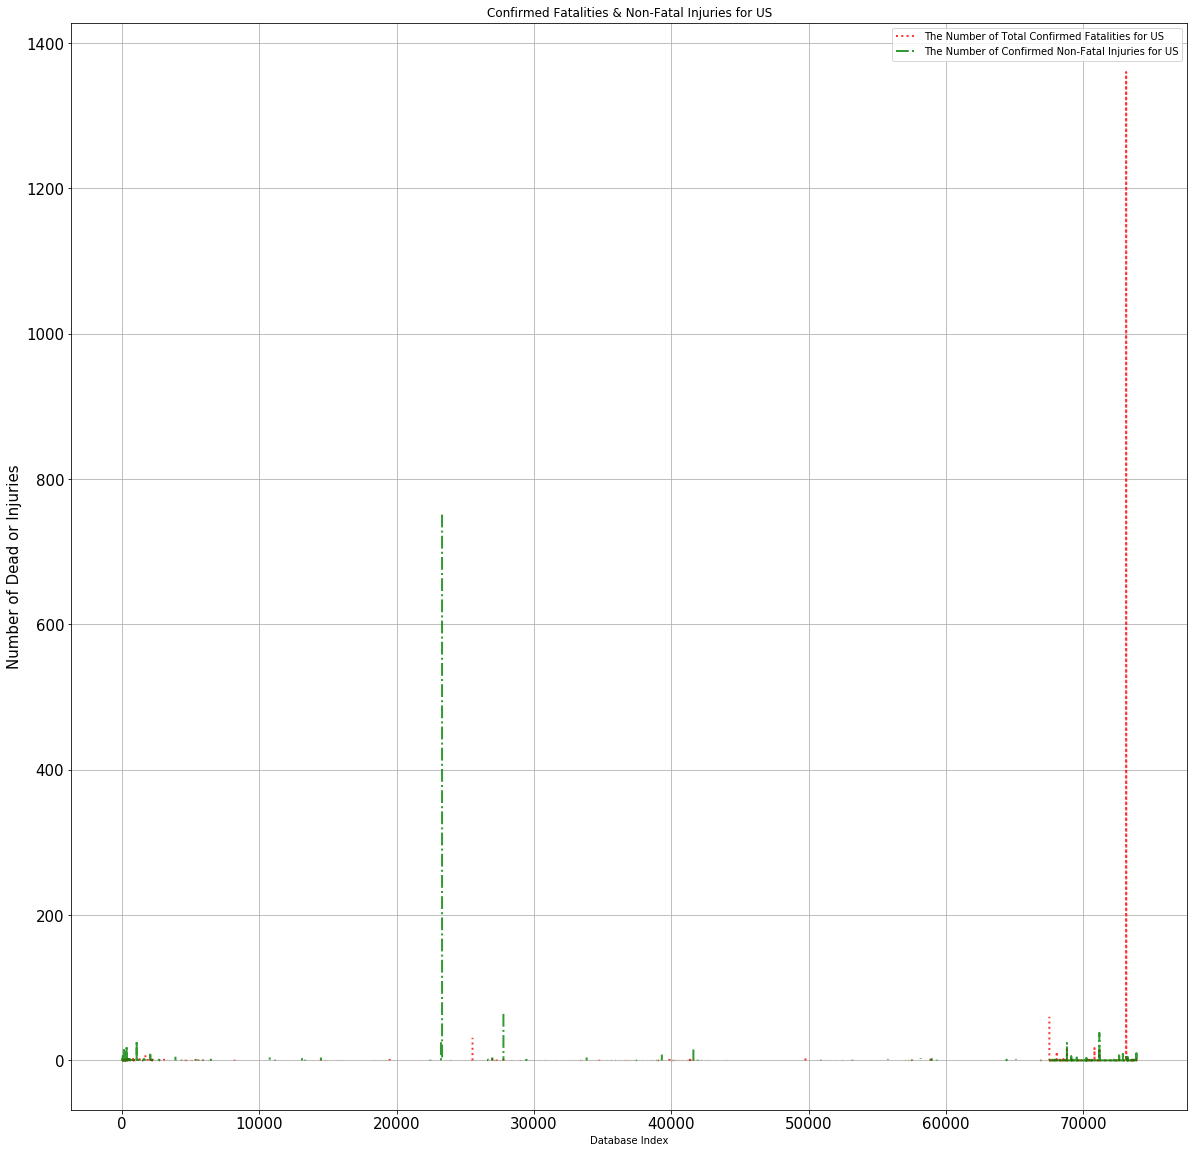

In [21]:

df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()



##### Given that the data is sorted by dates, attacks on US citizens seem to be very rare in a given date range. But the terrorist act against the citizens of US has been increasingly in the following year after this rare date range. By finding the date of the start of the increase, the factors in increasing terrorist acts can be easily identified by taking into account the changes and developments in the country after this date

# Death and Injuries at all time.



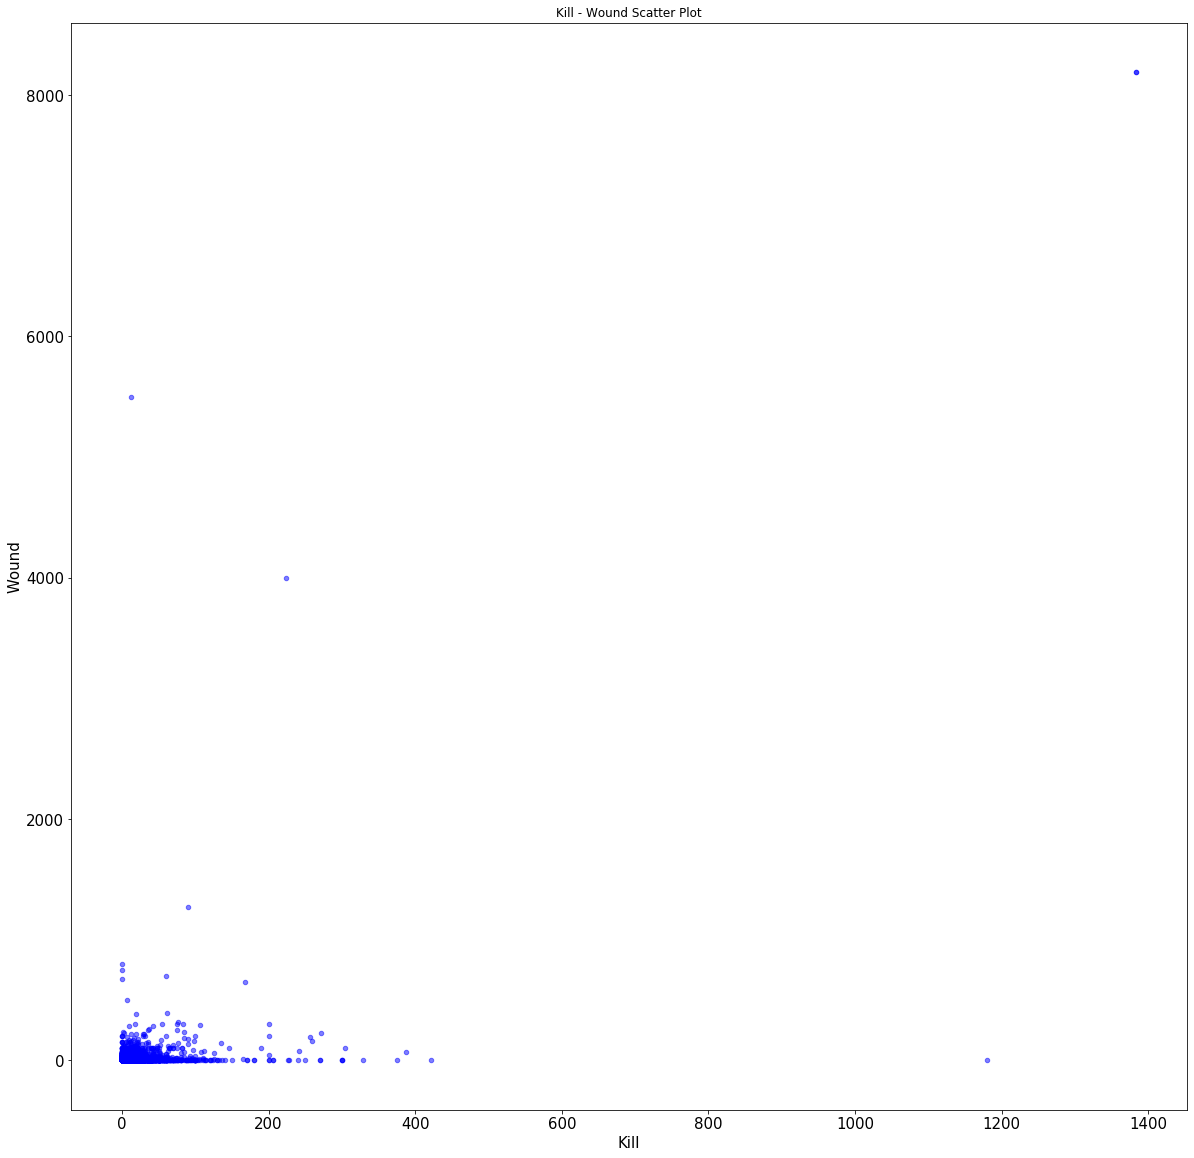

In [44]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'blue', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

###### In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.

# Frequency of Terrorist Actions in Customized Region
### Let's analyze in Middle East and North Africa



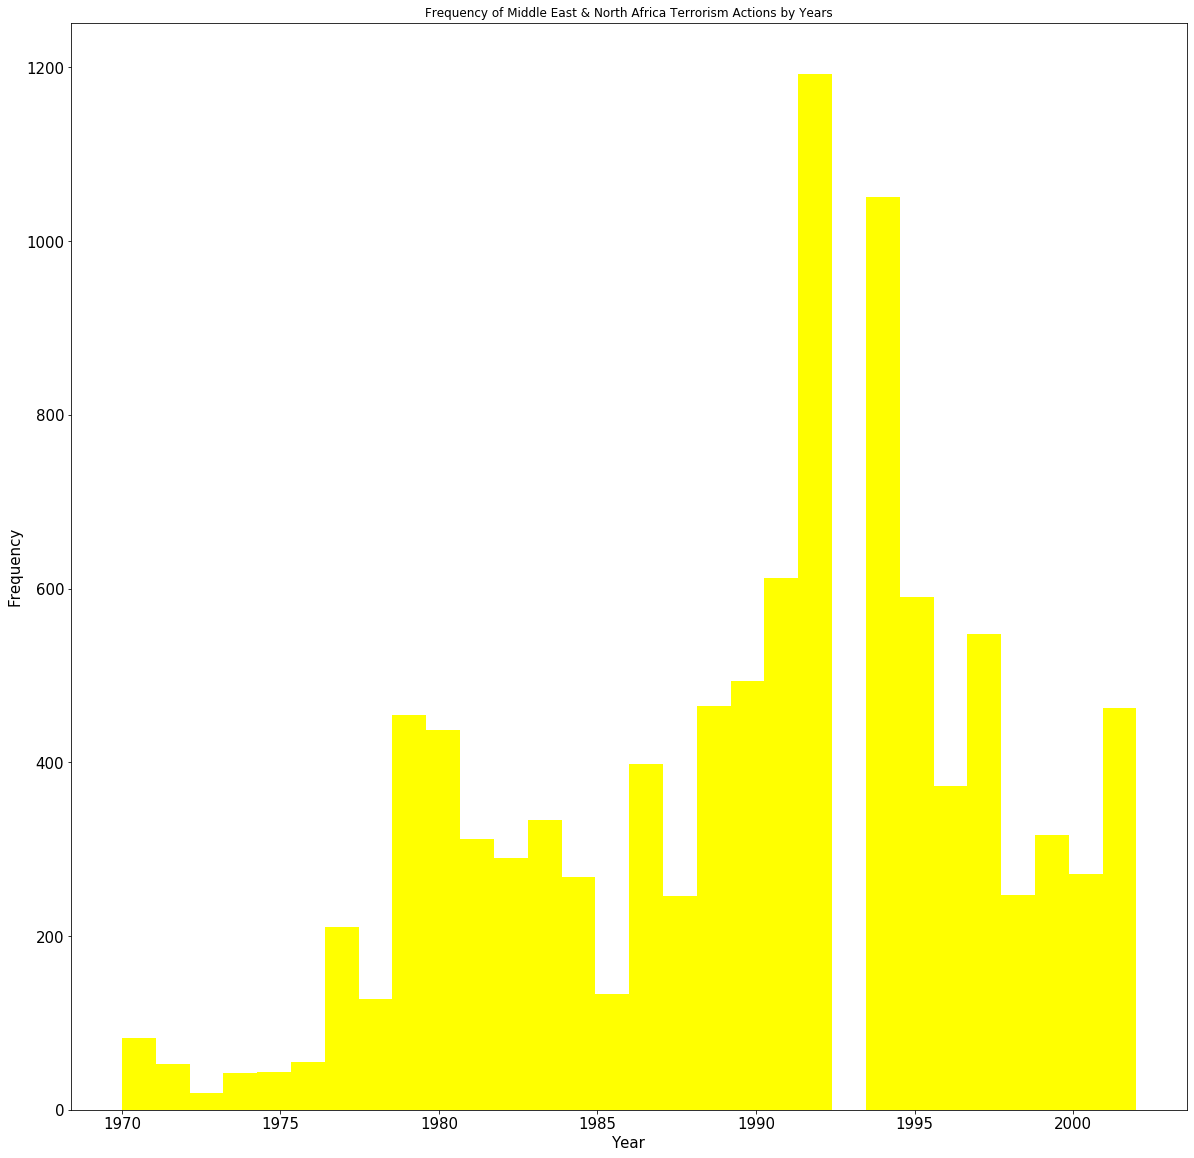

In [46]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'yellow', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

##### Terrorist attacks have increased in recent years.

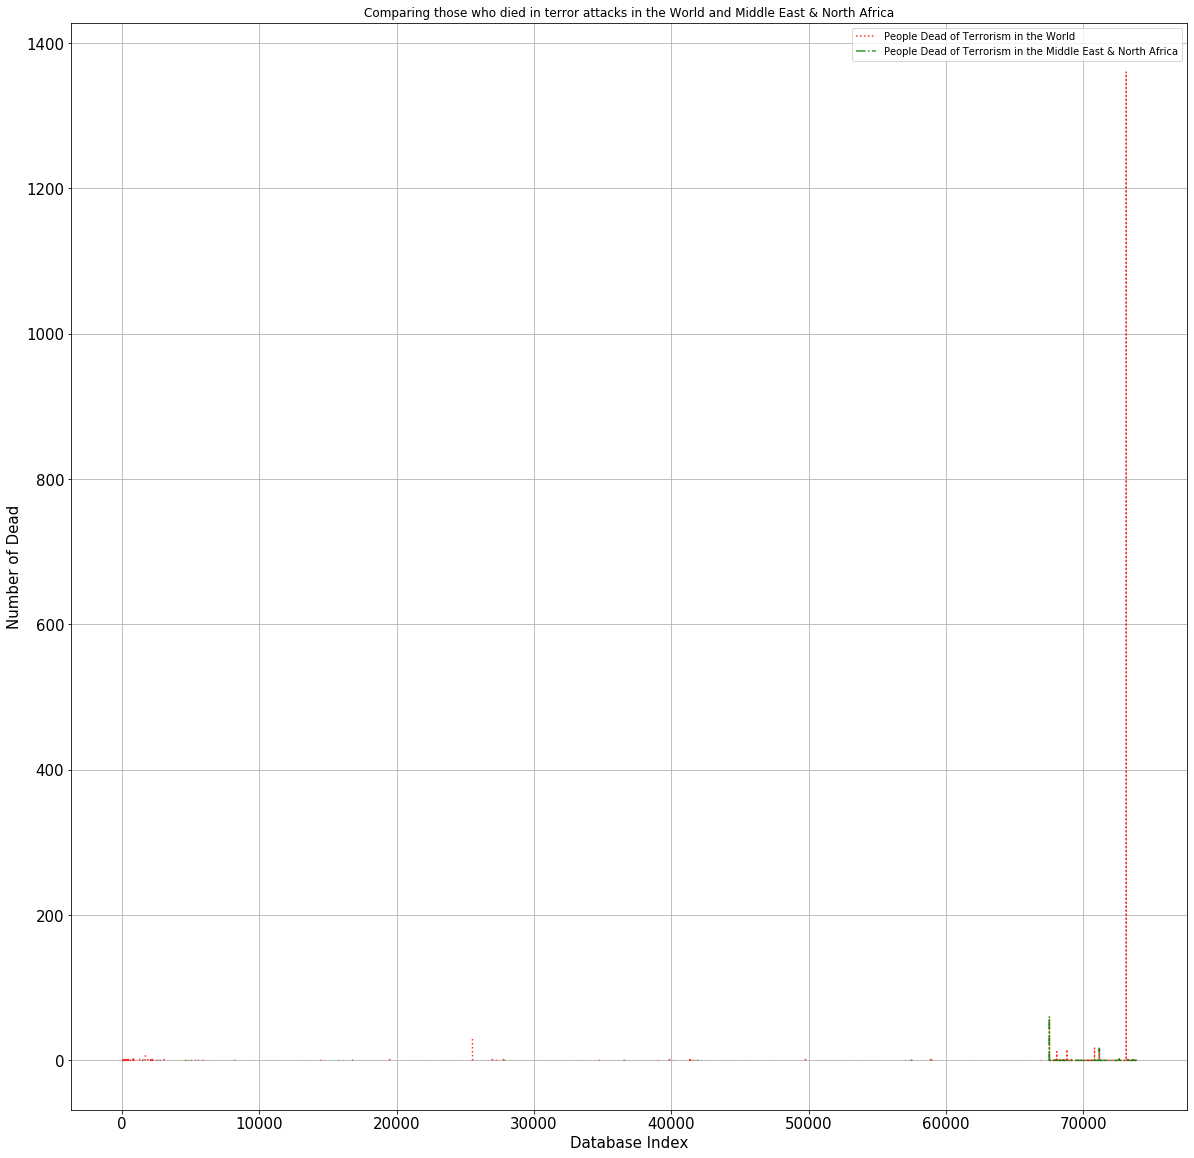

In [47]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()


## Terrorist Attacks of a Particular year and their Locations.
#### Let's look at the terrorist acts in the world over a certain year

In [28]:
filterYear = df['iyear'] == 1970

filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

#### 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

# Total Number of people killed in terror attack

In [30]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 153273


### Let's look at what types of attacks these deaths were made of


In [ ]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [32]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,82807.0,16617.0,32123.0,1795.0,3478.0,984.0,2796.0,624.0,12049.0


In [33]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


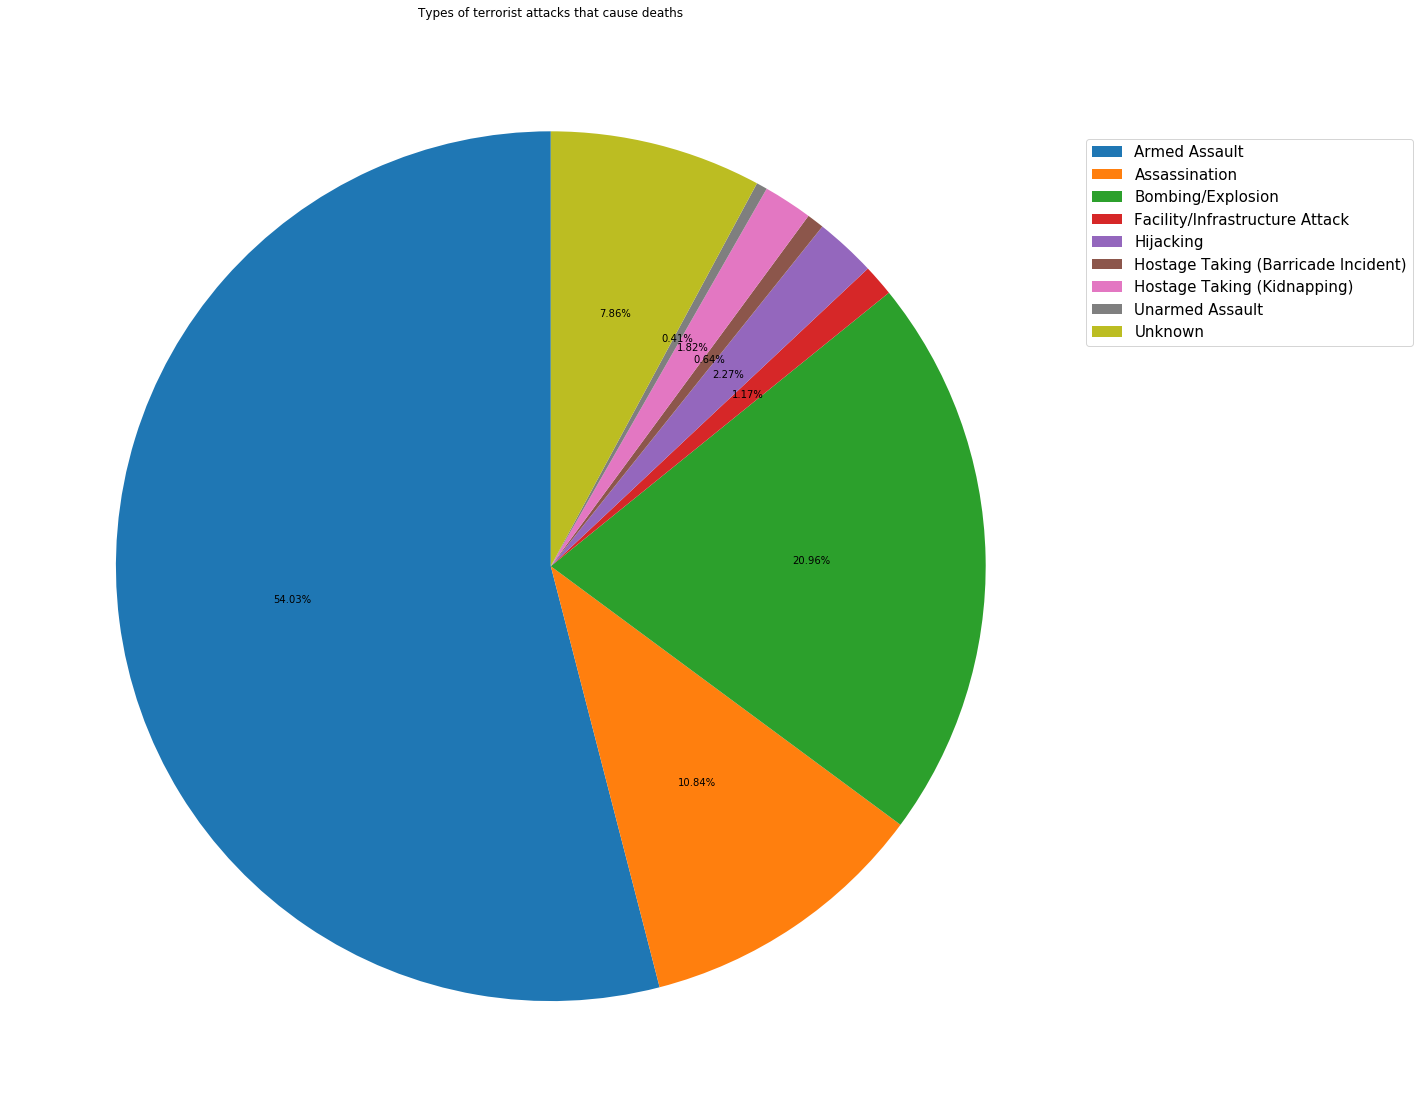

In [48]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

### Number of Killed in Terrorist Attacks by Countries




In [50]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,641.0,41.0,8658.0,0.0,3016.0,0.0,490.0,30.0,13.0,27.0,...,1.0,0.0,750.0,97.0,1.0,93.0,119.0,324.0,70.0,137.0


In [51]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 199 entries, Afghanistan to Zimbabwe
dtypes: float64(199)
memory usage: 1.6+ KB


In [52]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

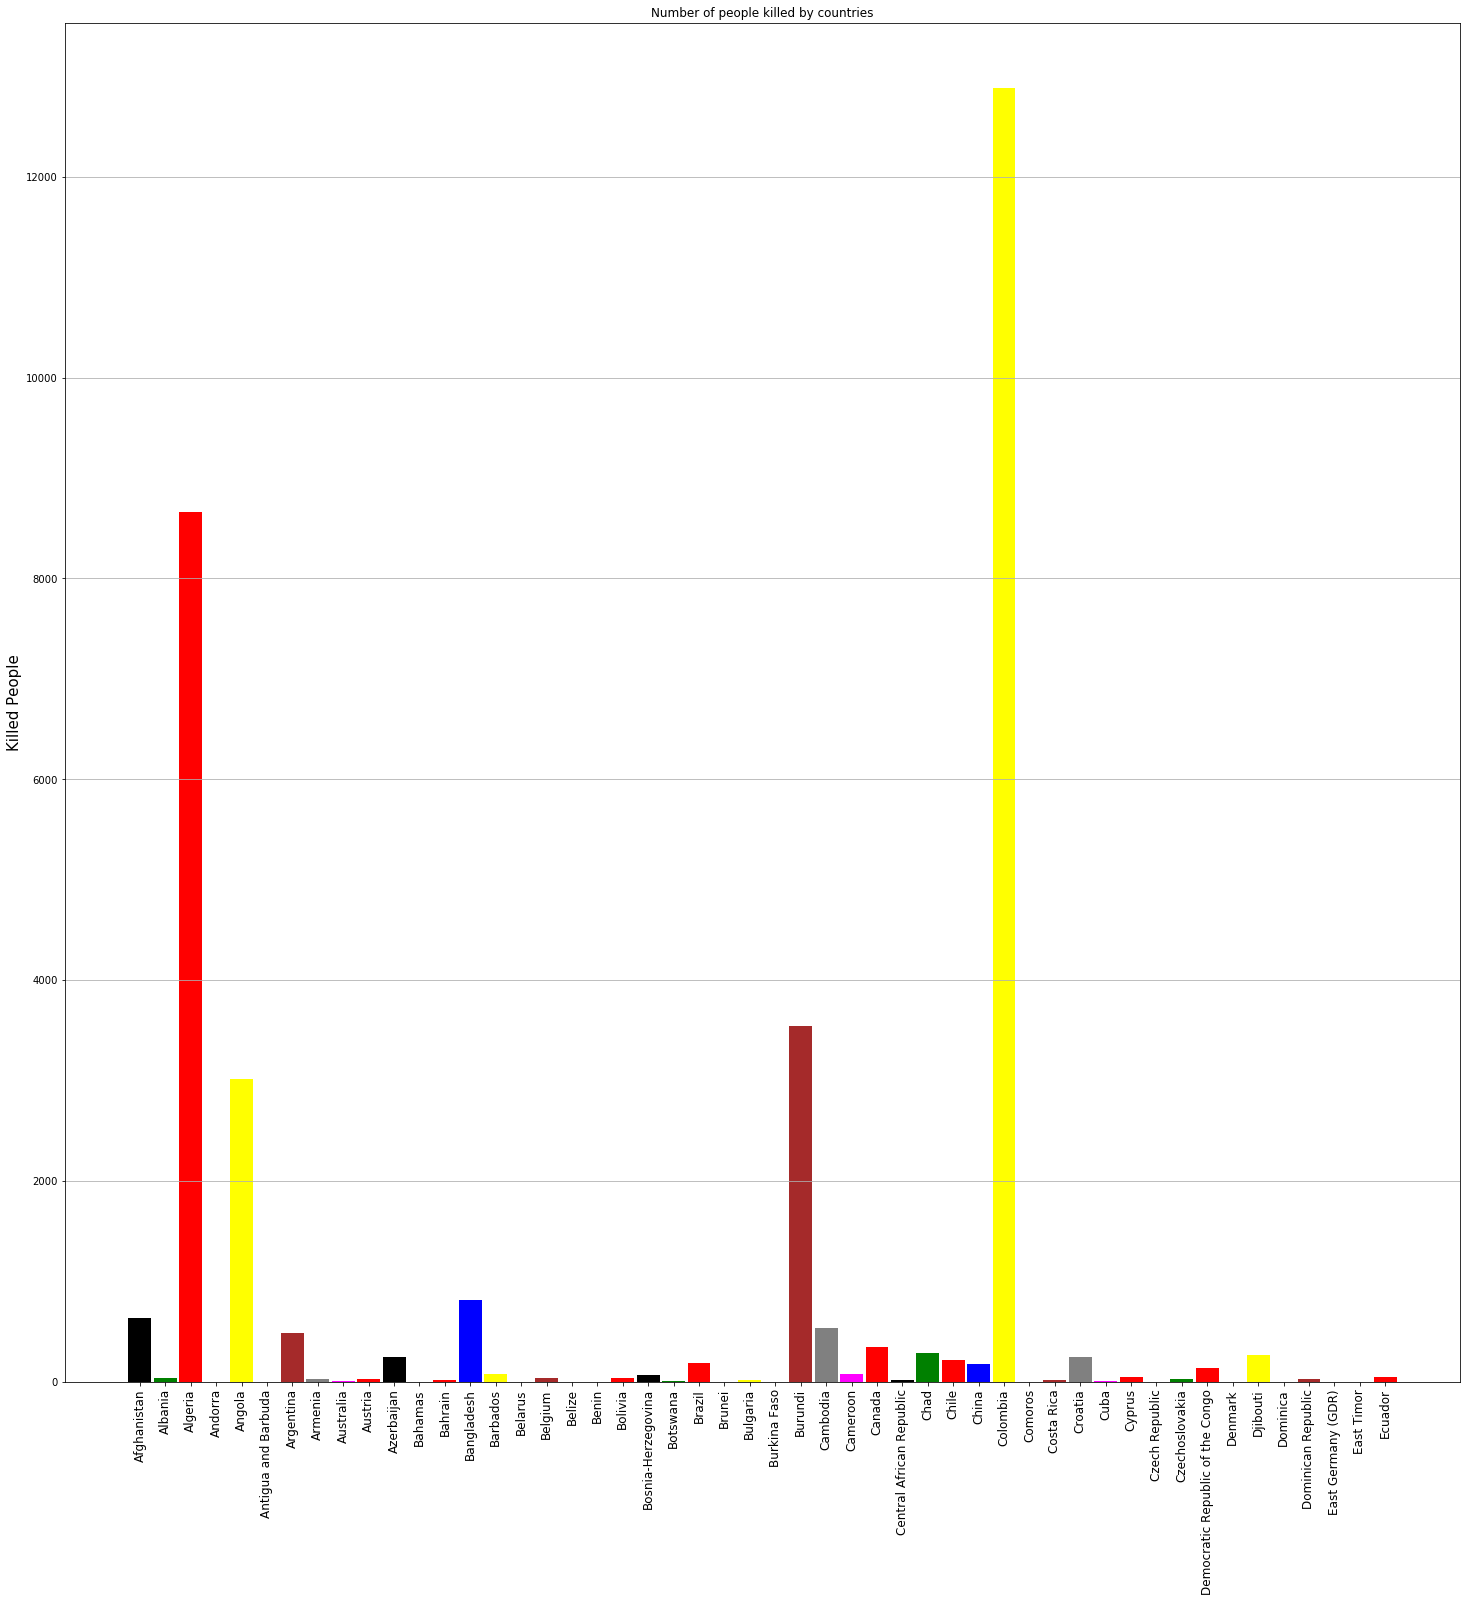

In [53]:

labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['black', 'green', 'red', 'blue', 'yellow', 'cyan', 'brown', 'gray', 'magenta', 'red'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

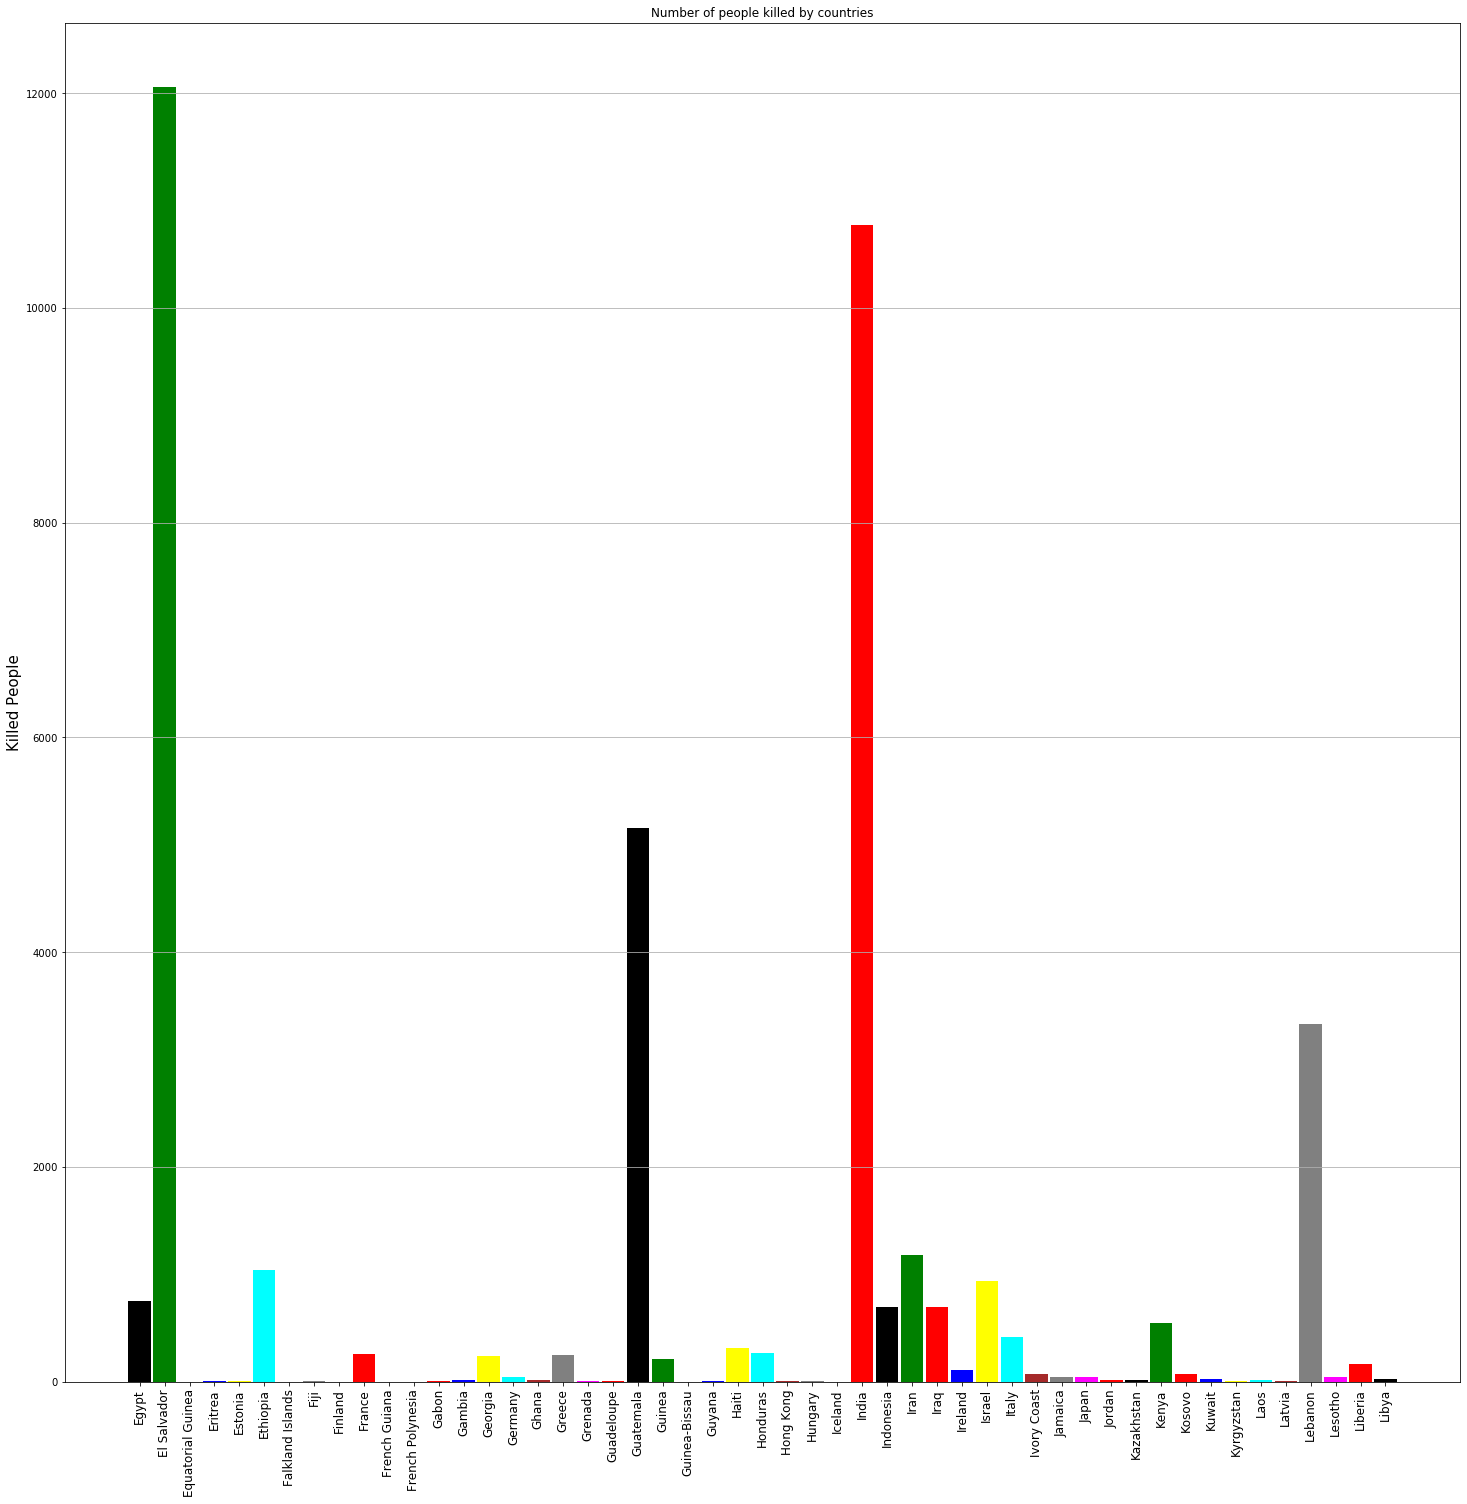

In [54]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['black', 'green', 'red', 'blue', 'yellow', 'cyan', 'brown', 'gray', 'magenta', 'red']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

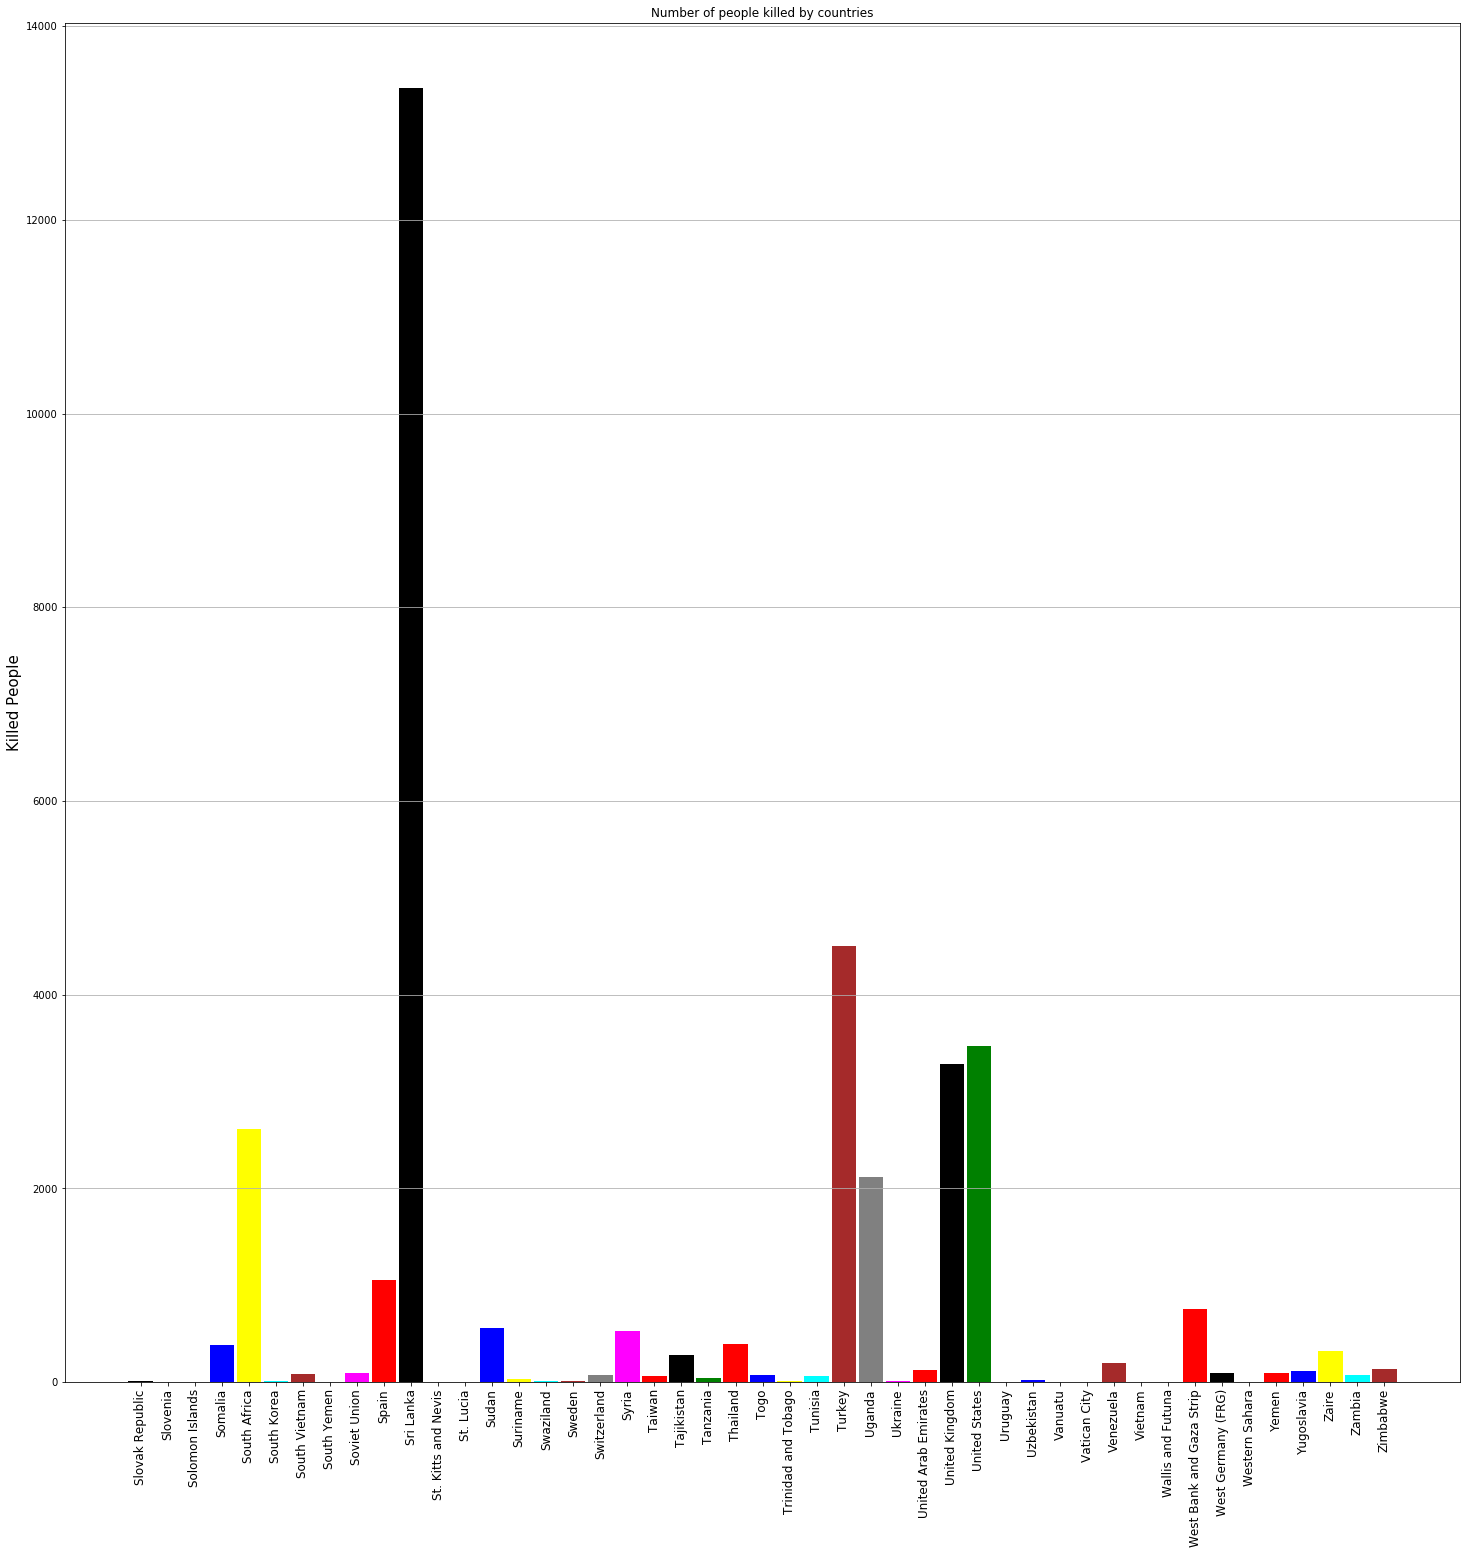

In [55]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['black', 'green', 'red', 'blue', 'yellow', 'cyan', 'brown', 'gray', 'magenta', 'red']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

### Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.


## thank You !